In [1]:
import pandas as pd
from sentim_tripadvisor import get_sentiment_score, clean_data, get_wordcloud

## Load data and lexicon

In [3]:
hotel_types = ['acampamento', 'estalagens', 'hotels', 'resorts', 'vilas']

In [4]:
dfs = []
for hotel in hotel_types:
    dfs.append(clean_data(f'data/{hotel}/ExtractedReviews.xlsx', hotel))

data = pd.concat(dfs, axis=0)    
lexi = pd.read_csv('senti.csv')

### split pre and pos covid data

In [5]:
data_pre = data[data['covid_state']=='Pre-Covid']
data_pre.head(5)

rating            date                                               text  \
7        5  fevereiro 2020  Tudo perfeito!A localização, ímpar e especial ...   
8        5   dezembro 2019  Um fim de semana muito bom o espaço é muito bo...   
9        5   setembro 2019  ExcelenteTivemos uma óptima estadia, serviço d...   
10       5   setembro 2019  É o paraíso!!!Viagem em família e as 3 geraçõe...   
11       5   setembro 2019  Belíssimas casas junto ao rio, com canoas e ou...   

   covid_state   hotel_type  
7    Pre-Covid  acampamento  
8    Pre-Covid  acampamento  
9    Pre-Covid  acampamento  
10   Pre-Covid  acampamento  
11   Pre-Covid  acampamento

In [6]:
data_pos = data[data['covid_state']=='Pos-Covid']
data_pos.head(5)

rating           date                                               text  \
0       5      maio 2022  Foi uma agradável surpresa. Limpeza e instalaç...   
1       5     março 2022  Onde o dom de bem receber se cruza com a exube...   
2       4  novembro 2021  Um spot maravilhoso junto ao rio que nos trans...   
3       5  setembro 2021  Recomendo sem dúvida,  sítio maravilhoso, uma ...   
4       5    agosto 2021  Seriam sempre poucas as palavras para descreve...   

  covid_state   hotel_type  
0   Pos-Covid  acampamento  
1   Pos-Covid  acampamento  
2   Pos-Covid  acampamento  
3   Pos-Covid  acampamento  
4   Pos-Covid  acampamento

## Get sentiment scores using the PT lexicon

In [7]:
scores_pre = data_pre.apply(lambda x: get_sentiment_score(x, lexi), axis=1)
scores_pos = data_pos.apply(lambda x: get_sentiment_score(x, lexi), axis=1)

## Give Positive, Negative or Neutral rankings

In [8]:
POS_RANK = 0.5
NEG_RANK = 0

# Positive if val>POS_RANK, Negative if val<NEG_RANK, else Neutral
def get_rank(val):
    if val < NEG_RANK:
        return 'Negative'
    elif val > POS_RANK:
        return 'Positive'
    else:
        return 'Neutral'
    
scores_pre['senti_rank'] = scores_pre.apply(lambda x: get_rank(x['senti_ratio']), axis=1)
scores_pre.drop(['rating', 'date', 'sum'], axis=1, inplace=True)
scores_pos['senti_rank'] = scores_pos.apply(lambda x: get_rank(x['senti_ratio']), axis=1)
scores_pos.drop(['rating', 'date', 'sum'], axis=1, inplace=True)

In [9]:
scores_pre.head(5)

text covid_state  \
7   Tudo perfeito!A localização, ímpar e especial ...   Pre-Covid   
8   Um fim de semana muito bom o espaço é muito bo...   Pre-Covid   
9   ExcelenteTivemos uma óptima estadia, serviço d...   Pre-Covid   
10  É o paraíso!!!Viagem em família e as 3 geraçõe...   Pre-Covid   
11  Belíssimas casas junto ao rio, com canoas e ou...   Pre-Covid   

     hotel_type  senti_ratio senti_rank  
7   acampamento     0.666667   Positive  
8   acampamento     1.000000   Positive  
9   acampamento     1.000000   Positive  
10  acampamento     0.800000   Positive  
11  acampamento     0.700000   Positive

In [10]:
scores_pos.head(5)

text covid_state   hotel_type  \
0  Foi uma agradável surpresa. Limpeza e instalaç...   Pos-Covid  acampamento   
1  Onde o dom de bem receber se cruza com a exube...   Pos-Covid  acampamento   
2  Um spot maravilhoso junto ao rio que nos trans...   Pos-Covid  acampamento   
3  Recomendo sem dúvida,  sítio maravilhoso, uma ...   Pos-Covid  acampamento   
4  Seriam sempre poucas as palavras para descreve...   Pos-Covid  acampamento   

   senti_ratio senti_rank  
0     0.750000   Positive  
1     0.666667   Positive  
2     1.000000   Positive  
3     1.000000   Positive  
4     0.875000   Positive

## Save to csv

In [10]:
scores_pre.to_csv('results_pre.csv', index=False)
scores_pos.to_csv('results_pos.csv', index=False)

## Word Cloud

In [11]:
scores_pre = pd.read_csv('results_pre.csv')
scores_pos = pd.read_csv('results_pos.csv')
# load stopwords
# load stopwords
with open('stopwords.txt', 'r') as f:
    stopwords = [line.strip() for line in f]
stopwords = stopwords + ['quarto', 'hotel', 'todo', 'tudo', 'espaço', 'toda', 'todos', 'todas', 'quartos', 'staff', 'pequeno', 'almoço', 'casa']

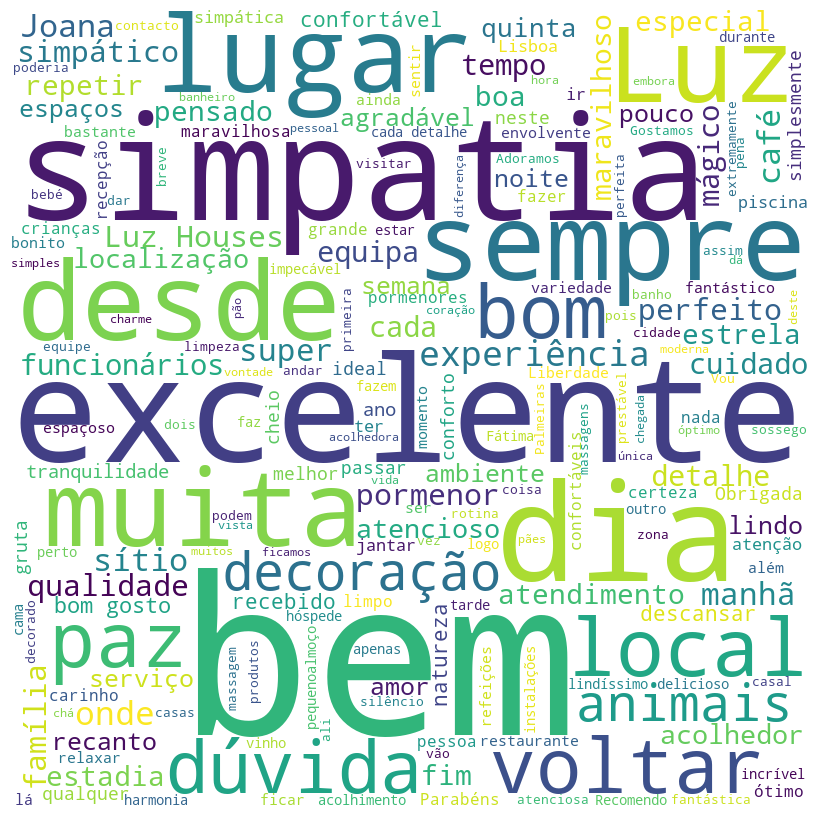

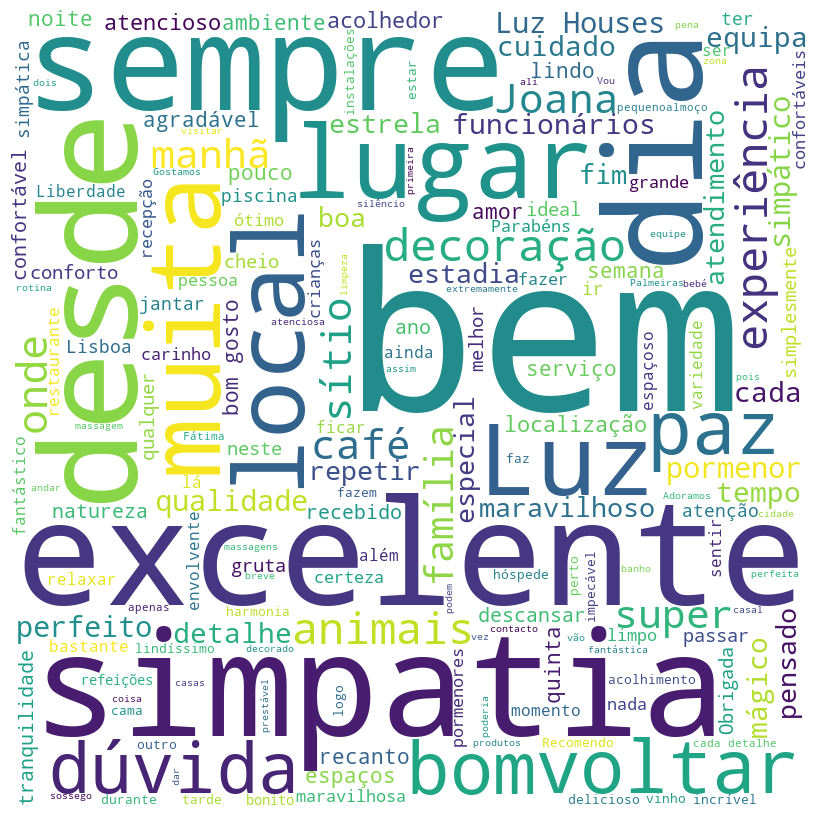

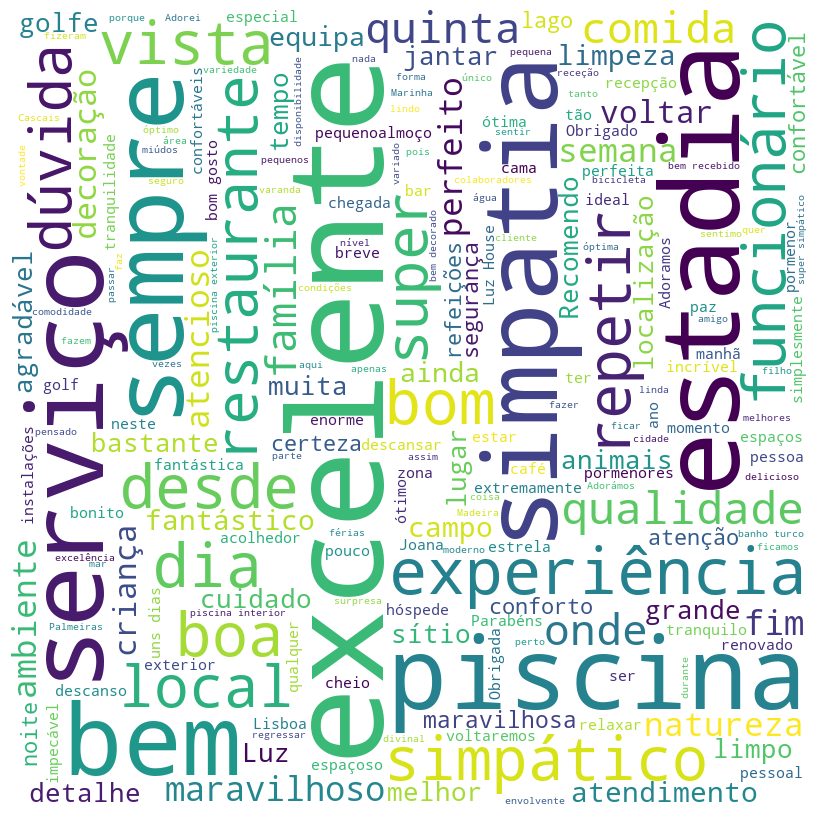

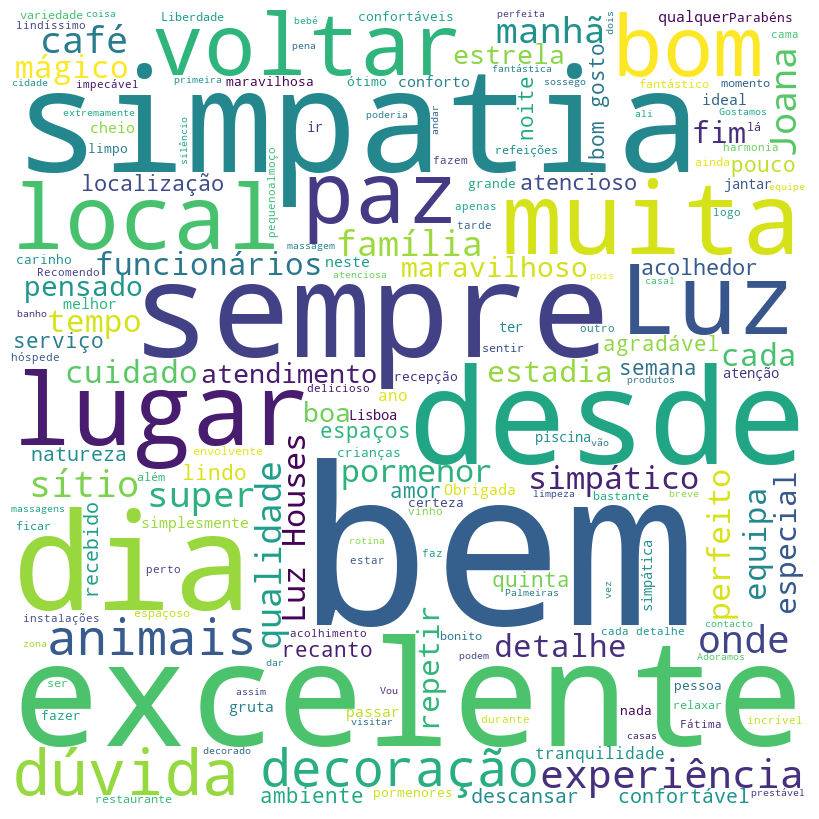

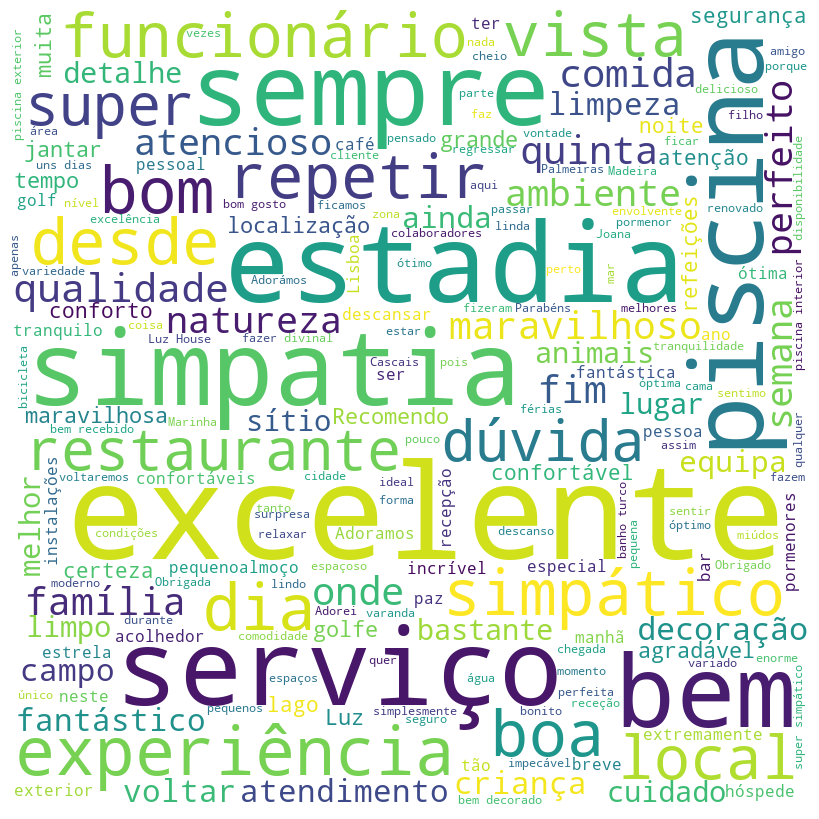

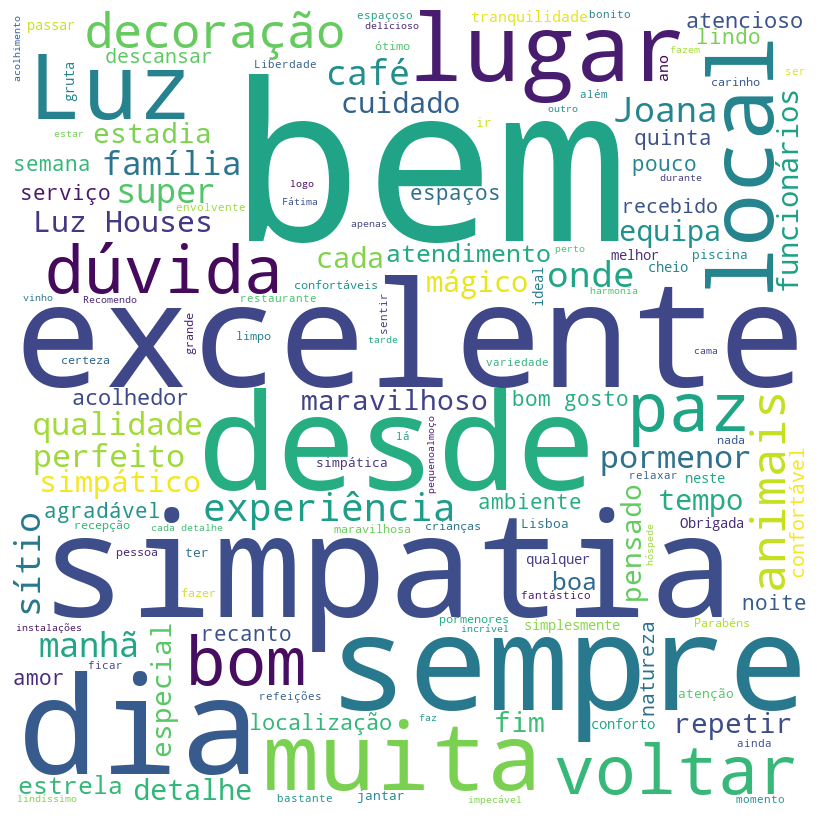

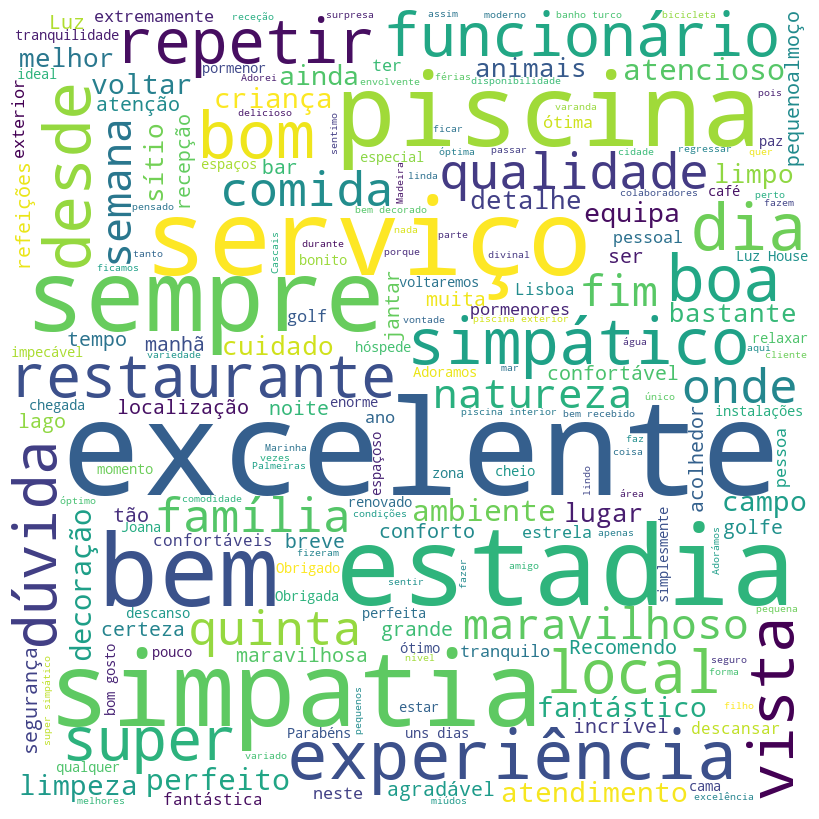

In [12]:
for hotel in hotel_types:
    word_lst_pre = scores_pre[scores_pre['hotel_type']=='hotels']['text'].to_list()
    word_lst_pos = scores_pos[scores_pos['hotel_type']=='hotels']['text'].to_list()
    get_wordcloud(word_lst_pre, 'Pre-Covid', hotel, stopwords)
    get_wordcloud(word_lst_pos, 'Pos-Covid', hotel, stopwords)